In [1]:
pip install -U seaborn

Requirement already up-to-date: seaborn in /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages (0.11.1)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn
import scipy.stats
import statsmodels.api as sm

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


The following describes the dataset variables:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* LSTAT - \% lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

---
---

--- 

## PART1

For all visualizations, please include a title in each graph and appropriate labels.

Generate the following and explain your findings:

* For the "Median value of owner-occupied homes" provide a **boxplot**
* Provide a  **histogram** for the Charles river variable
* Provide a **boxplot** for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
* Provide a **scatter plot** to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
* Create a **histogram** for the pupil to teacher ratio variable

## For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 0, 'Median value of owner-occupied homes')

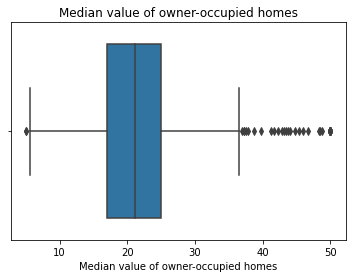

In [5]:
ax = seaborn.boxplot(x='MEDV', data=boston_df)
ax.set_title('Median value of owner-occupied homes')
ax.set_xlabel('Median value of owner-occupied homes')

### <span style='background :lightgreen' >Conclusion:</span>
<span style='color: blue'>We see that the values of MEDV are distributed normally with some outliers.</span>

---
---

---

## Provide a histogram for the Charles river variable

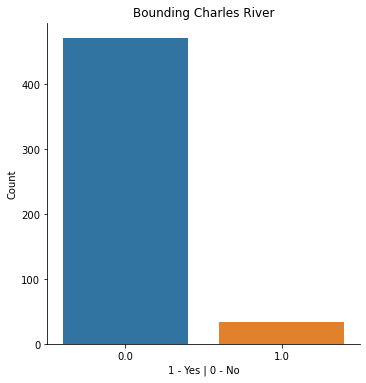

In [6]:
ax = seaborn.catplot(x='CHAS', kind='count', data=boston_df).set(title='Bounding Charles River', ylabel='Count', xlabel='1 - Yes | 0 - No')

### <span style='background :lightgreen' >Conclusion:</span>
<span style='color: blue'>The vast majority of houses are set back from the banks of the Charles River

---
---

---

## Provide a boxplot for the MEDV variable vs the AGE variable.

In [7]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

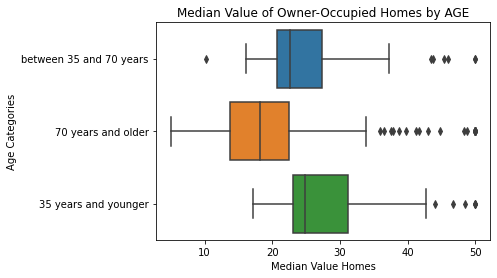

In [8]:
ax = seaborn.boxplot(
    x='MEDV', y='age_group', data=boston_df
).set(
    title='Median Value of Owner-Occupied Homes by AGE', xlabel='Median Value Homes', ylabel='Age Categories'
)

### <span style='background :lightgreen' >Conclusion:</span>
<span style='color: blue'>The eldest group contains the lowest median house value. The younger group contains the highest median house value.

---
---

---

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

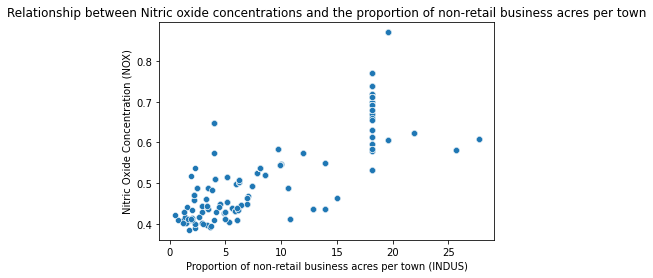

In [9]:
ax = seaborn.scatterplot(x='INDUS', y='NOX', data=boston_df).set(
    title='Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town',
    ylabel='Nitric Oxide Concentration (NOX)',
    xlabel='Proportion of non-retail business acres per town (INDUS)'
)

### <span style='background :lightgreen' >Conclusion:</span>
<span style='color: blue'>The larger is the non-retail business acres per town the larger is the nitric oxides concentration.

---
---

--- 

## Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Pupil to teacher ratio')

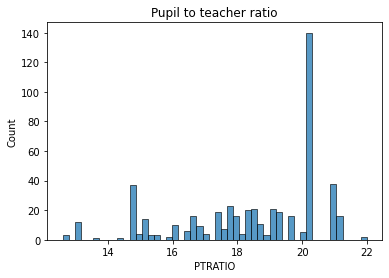

In [10]:
ax = seaborn.histplot(data=boston_df, x='PTRATIO', bins=50)
ax.set_title('Pupil to teacher ratio')

### <span style='background :lightgreen' >Conclusion:</span>
<span style='color: blue'>nonparametric distribution with accumulation in the proportion of approximately 21 pupils per teacher

---
---

*** 

## PART2

For each of the following questions;

* Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
* Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
* Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
* What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

* State your hypothesis.
* Use α = 0.05
* Perform the test Statistics.
* State the conclusion from the test.

--- 

## Is there a significant difference in median value of houses bounded by the Charles river or not?

### <span style='color: darkred' >State the hypothesis</span>

- $H_0: µ_1 = µ_2$ ("there is no difference in mean value of houses by the river and far from the river")
- $H_1: µ_1 ≠ µ_2$ ("there is a difference in mean value of houses by the river and far from the river")

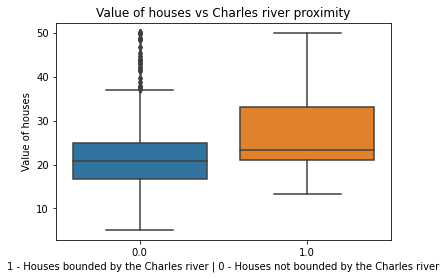

In [11]:
ax = seaborn.boxplot(x='CHAS', y='MEDV', data=boston_df).set(
    title='Value of houses vs Charles river proximity',
    ylabel='Value of houses',
    xlabel='1 - Houses bounded by the Charles river | 0 - Houses not bounded by the Charles river'
)

In [12]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

### <span style='background :lightgreen' >Conclusion:</span>
<span style='color: blue'>Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by Charles river


***
***

---

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

### <span style='color: darkred' >State the hypothesis</span>

-   $H_0: µ_1 = µ_2 = µ_3$ (the three population means are equal)
-   $H_1:$ At least one of the means differ

In [13]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [14]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


### <span style='background :lightgreen' >Conclusion:</span>
<span style='color: blue'>Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

***
***

---

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

### <span style='color: darkred' >State the hypothesis</span>

-   $H_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
-   $H_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

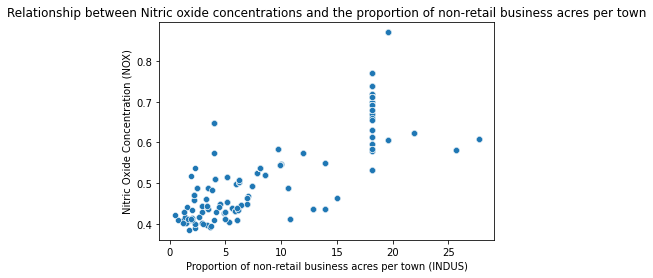

In [15]:
ax = seaborn.scatterplot(x='INDUS', y='NOX', data=boston_df).set(
    title='Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town',
    ylabel='Nitric Oxide Concentration (NOX)',
    xlabel='Proportion of non-retail business acres per town (INDUS)'
)

In [16]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.763651446920915, 7.913361061239593e-98)

### <span style='background :lightgreen' >Conclusion:</span>
<span style='color: blue'>Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

***
---

--- 

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

### <span style='color: darkred' >State the hypothesis</span>

-   $H_0: β1$ = 0 (Weighted distance to the five Boston employment centres has no effect on the median value of owner occupied homes)
-   $H_1: β1$ is not equal to 0 (Weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes)

In [17]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 13 Feb 2021   Prob (F-statistic):           1.21e-08
Time:                        16:39:52   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <span style='background :lightgreen' >Conclusion:</span>
<span style='color: blue'>The p-value is less than the alpha level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in mean evaluation scores based on distance.

In [18]:
boston_df[['DIS', 'MEDV']].corr()

,DIS,MEDV
DIS,1.000000,0.249929
MEDV,0.249929,1.000000


### <span style='background :lightgreen' >Conclusion:</span>

<span style='color: blue'>As the correlation coefficient is equal to 0.249929, we consider it as a weak correlation

<span style='color: blue'>The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is an impact of DIS variable on MEDV variables.

<span style='color: blue'>R-squared = 0.062 is quite low, so only 6.2% variation of y is explained by X

<span style='color: blue'>Prob(F-statistics) is close to zero It depicts the probability of null hypothesis being true. As the Probability is close to zero, so we reject the null hypothesis.

<span style='color: blue'>Looking at the analysis we can describe the MEDS variable as:

<span style='color: blue'>MEDV = 18.3901 + 1.0916 * DIS

<span style='color: blue'>So the coefficient 1.0916 means that for every additional 'weighted unit of distance' of DIS variable, the median value of owner occupied homes (MEDV) increases by 1.0916.